## Advanced Lane Finding Project

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

---
## First, I'll compute the camera calibration using chessboard images

In [38]:
import pickle
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

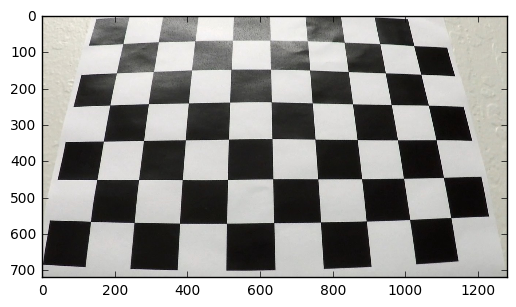

In [39]:
test_img = mpimg.imread('camera_cal/calibration3.jpg')
plt.imshow(test_img)

# Calibrate camera and test undistort

In [40]:
def turn_to_gray(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return gray

def find_corner_points(img, grid_shape):
    ret, corners = cv2.findChessboardCorners(img, grid_shape, None)
    return ret, corners
    
def calibrate_camera(img, objpoints, imgpoints):
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[:-1], None, None)
    return ret, mtx, dist, rvecs, tvecs
    
def cal_undistort(img, mtx, dist):
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    return undist

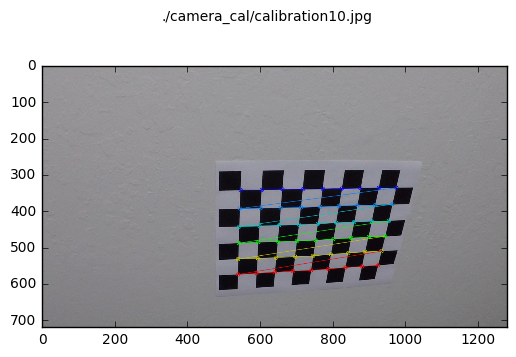

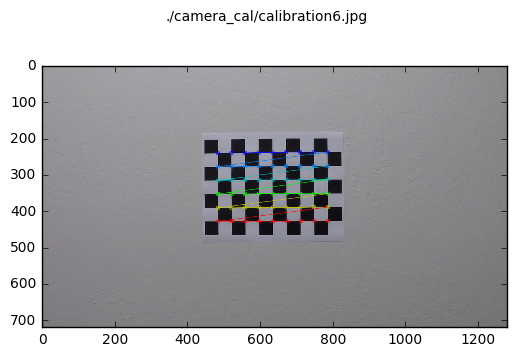

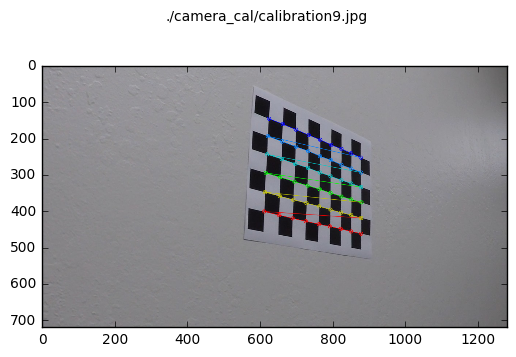

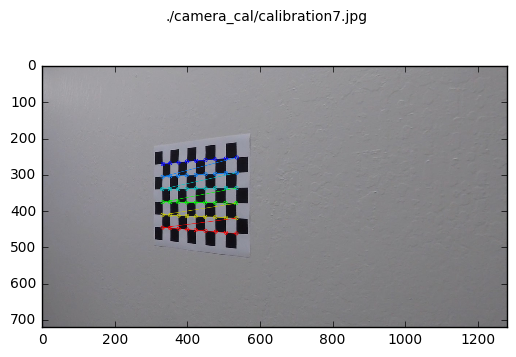

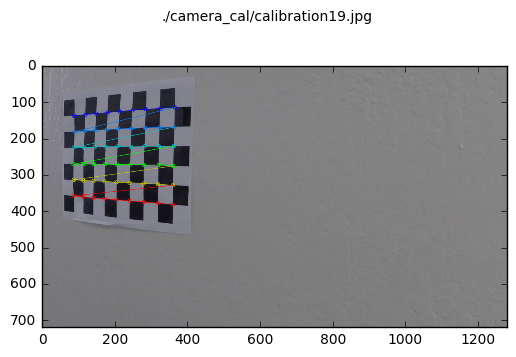

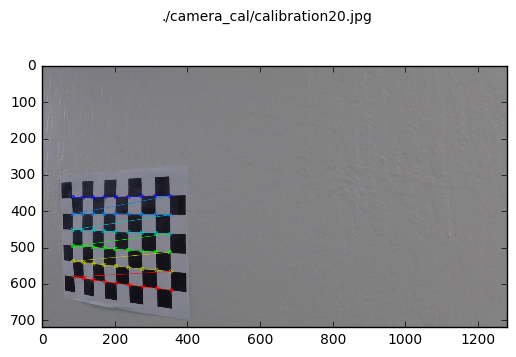

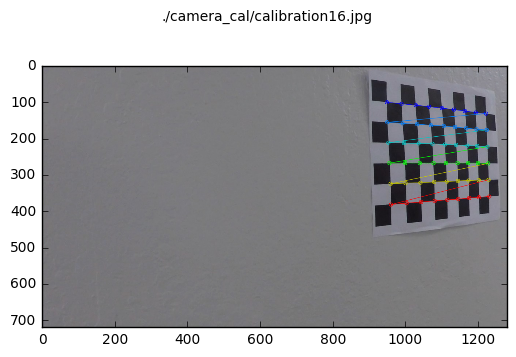

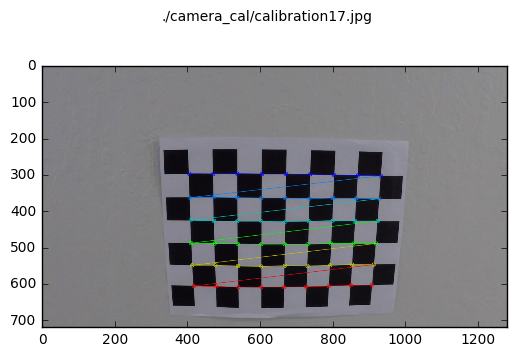

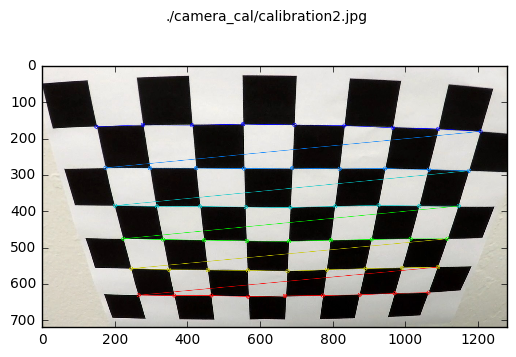

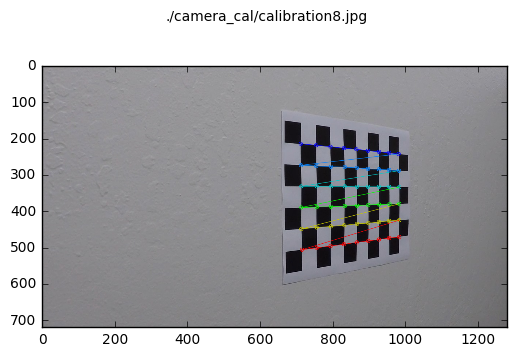

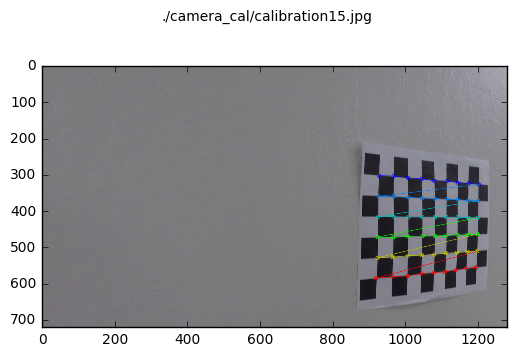

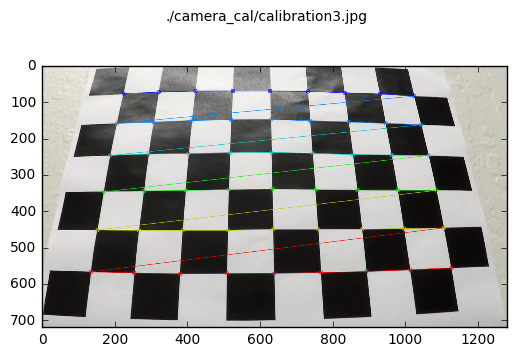

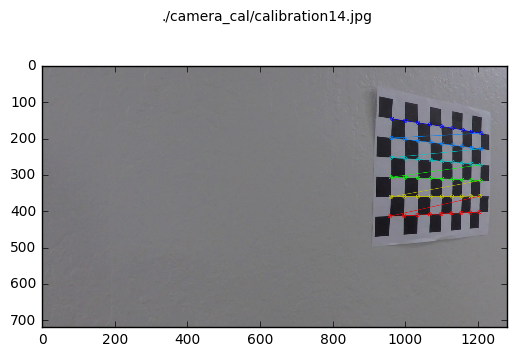

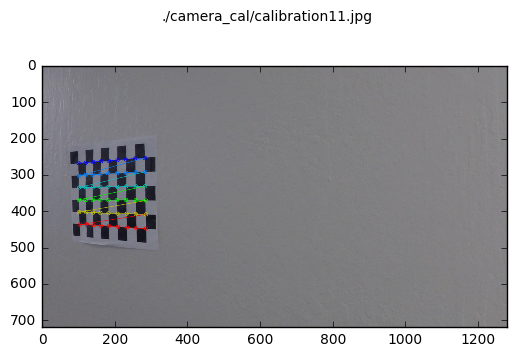

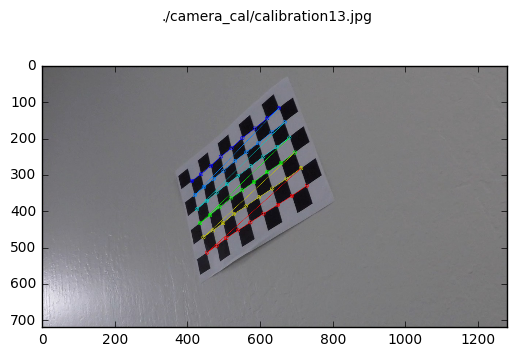

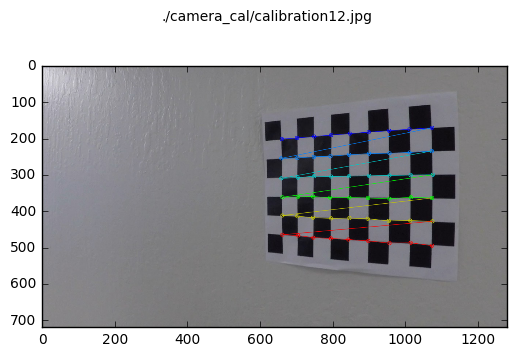

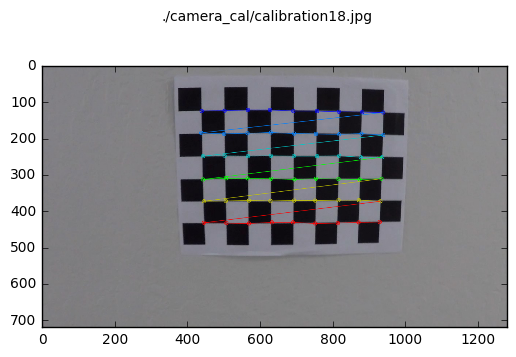

In [41]:
grid_shape = (9, 6)
objp = np.zeros((grid_shape[1]*grid_shape[0],3), np.float32)
objp[:,:2] = np.mgrid[0:grid_shape[0],0:grid_shape[1]].T.reshape(-1,2)
objpoints = []
imgpoints = []
imgs = glob.glob('./camera_cal/calibration*.jpg')

for fname in imgs:
    img = mpimg.imread(fname)
    ret, corners =  find_corner_points(turn_to_gray(img), grid_shape)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        img = cv2.drawChessboardCorners(img, grid_shape, corners, ret)
        plt.figure()        
        plt.imshow(img)
        plt.suptitle(fname)

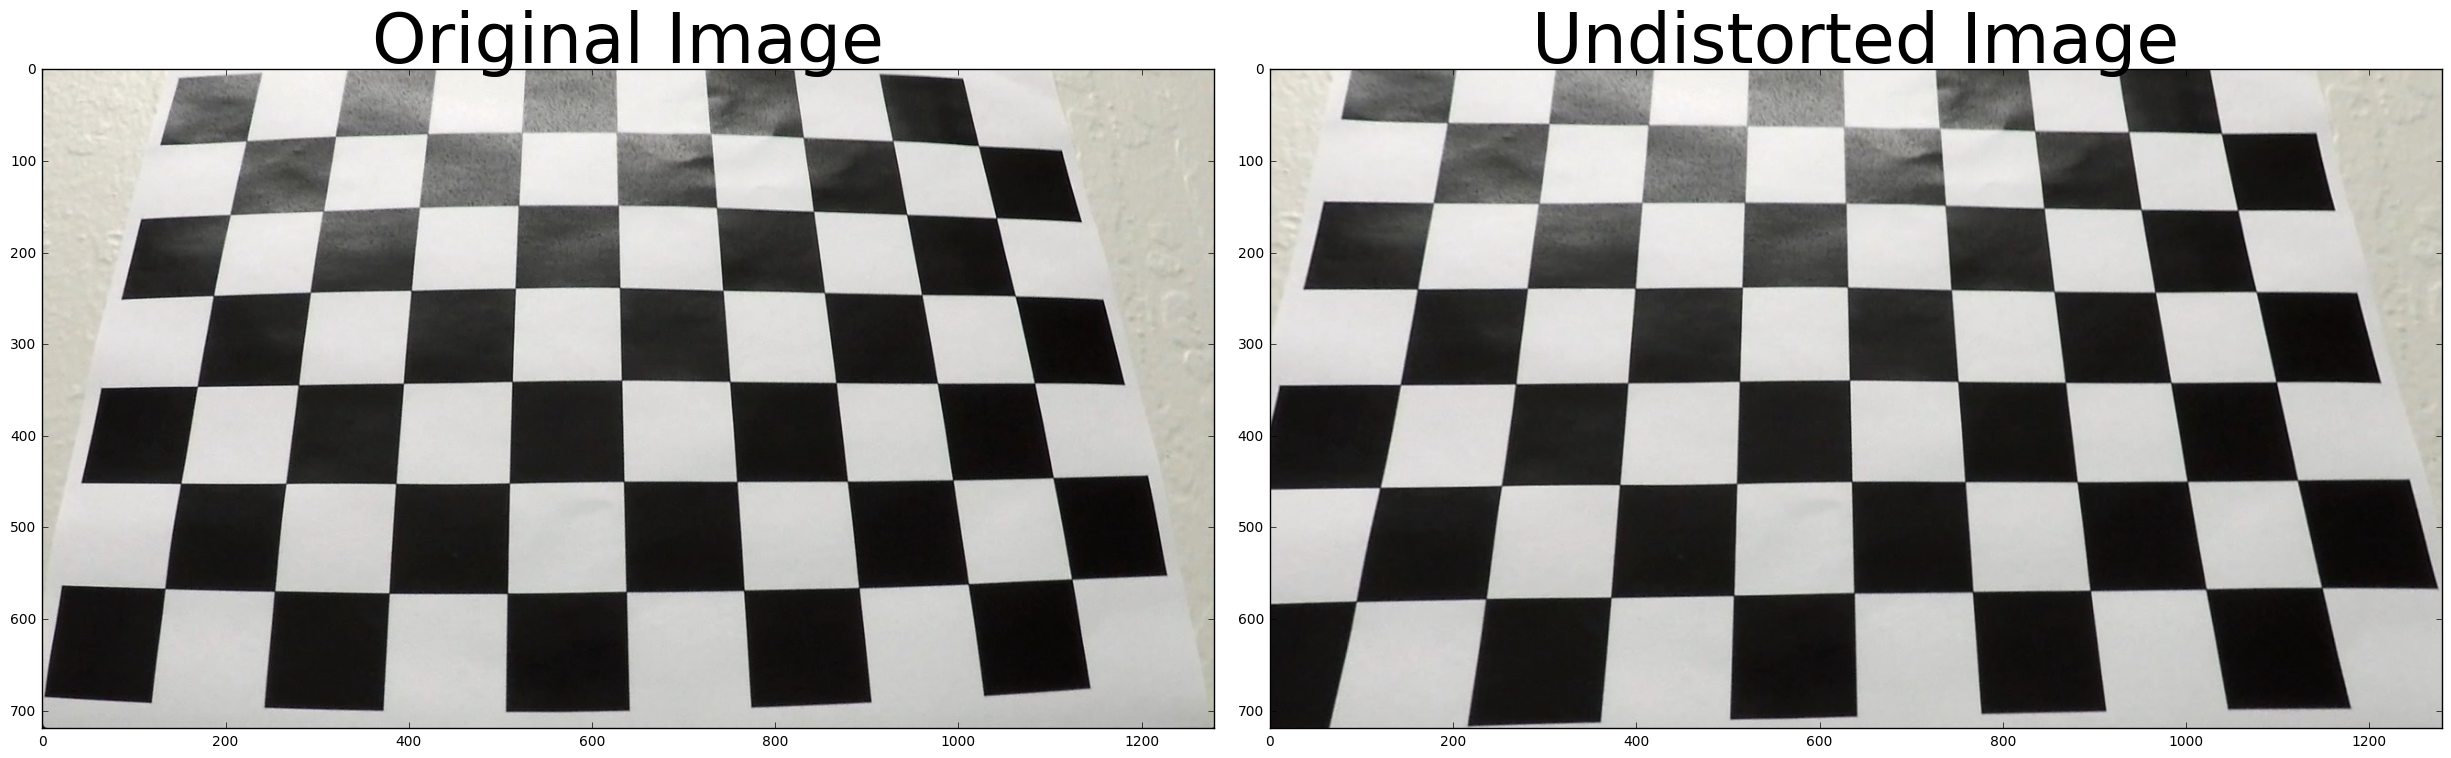

In [44]:
ret, mtx, dist, rvecs, tvecs = calibrate_camera(test_img, objpoints, imgpoints)
undistorted = cal_undistort(test_img, mtx, dist)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undistorted)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

# Perspective shift

In [45]:
def warp_perspective(img, src, dst):
    img_size = (img.shape[1], img.shape[0])
    M = cv2.getPerspectiveTransform(src, dst)
    warped = cv2.warpPerspective(img, M, img_size)
    return warped, M

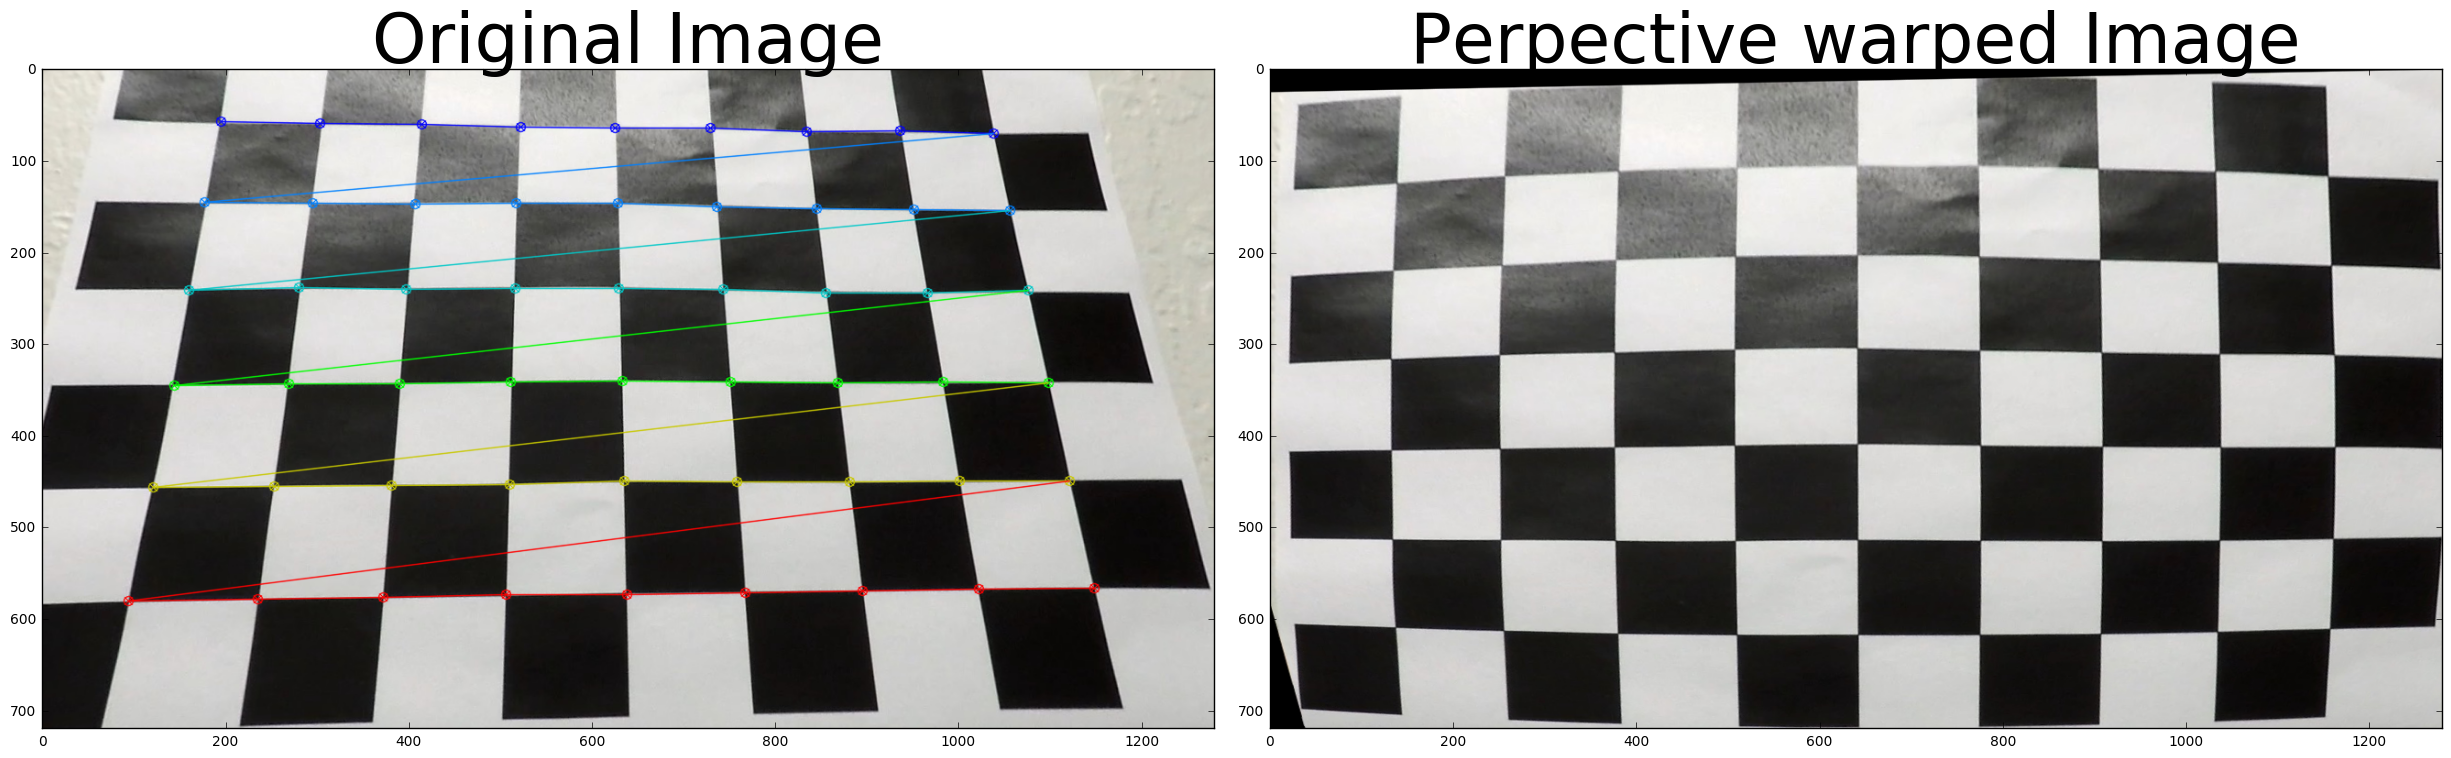

In [46]:
ret, corners =  find_corner_points(turn_to_gray(undistorted), grid_shape)
offset = 100
img_size = (undistorted.shape[1], undistorted.shape[0])

src = np.float32([corners[0][0], corners[grid_shape[0]-1][0], corners[-1][0], corners[-grid_shape[0]][0]])
dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                             [img_size[0]-offset, img_size[1]-offset], 
                             [offset, img_size[1]-offset]])

undistorted = cv2.drawChessboardCorners(undistorted, grid_shape, corners, ret)

warped, M = warp_perspective(test_img, src, dst)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(undistorted)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(warped)
ax2.set_title('Perpective warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

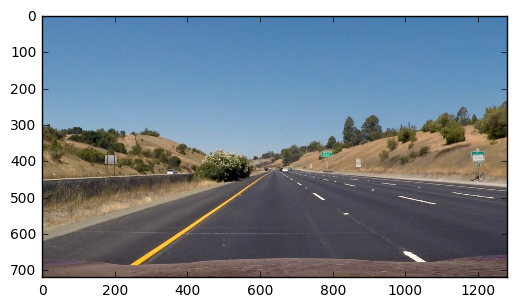

In [47]:
straight_lines = mpimg.imread('test_images/straight_lines1.jpg')
plt.imshow(straight_lines)